<a href="https://colab.research.google.com/github/PRASANNA-416/FACE-DETECTION-AND-RECOGNITION/blob/main/Face_Detection_and_Recognition_IEEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle

from random import randint
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
data = np.load('/content/gdrive/My Drive/ML/olivetti_faces.npy')


In [4]:
anchor1 = []
positive1 = [] 
negative1 = []

In [5]:
data = data.reshape(40,10,64,64,1)

5 * 4 * 39 * 40 *5

In [6]:
for different_person in range(35):
  for unique_person in range(5):
    for p_person in range(5):
      if p_person != unique_person:
        for n_person in range(35):
          if n_person != different_person:
            for x in range(5):       
              anchor1.append(data[different_person][unique_person])
              positive1.append(data[different_person][p_person])
              negative1.append(data[n_person][x])


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
anchor1, positive1,negative1 = shuffle(anchor1, positive1, negative1)

In [9]:
anchor_train = []
anchor_validation = []
anchor_test = []
positive_train = []
positive_validation = []
positive_test = []
negative_train = []
negative_validation = []
negative_test = []

In [10]:
for i in range(95200):
  anchor_train.append(anchor1[i])
  positive_train.append(positive1[i])
  negative_train.append(negative1[i])
for j in range(95200,107100):
  anchor_validation.append(anchor1[j])
  positive_validation.append(positive1[j])
  negative_validation.append(negative1[j])
for z in range(107100,119000):
  anchor_test.append(anchor1[z])
  positive_test.append(positive1[z])
  negative_test.append(negative1[z])

In [11]:
anchor_train = np.array(anchor_train)
anchor_validation = np.array(anchor_validation)
anchor_test = np.array(anchor_test)


In [12]:
positive_train = np.array(positive_train)
positive_validation = np.array(positive_validation)
positive_test = np.array(positive_test)
print(positive_test.shape)   

(11900, 64, 64, 1)


In [13]:
negative_train = np.array(negative_train)
negative_validation = np.array(negative_validation)
negative_test = np.array(negative_test)

FROM HERE IT IS ABOUT BUILDING AND TRAING THE MODEL AFTER DATA PREROCESSING 

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras import backend as K

In [15]:
model1 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(64,64,1)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=128, activation='sigmoid')
])

PLS NOTE THE AF PF NF WHICH STANDS FOR ANCHOR FEATURES AND ALL 

In [16]:
anchor = Input(shape=(64,64,1))
AF = model1(anchor)
positive = Input(shape=(64,64,1))
PF = model1(positive)
negative = Input(shape=(64,64,1))
NF = model1(negative)

model = Model(inputs = [anchor , positive, negative], outputs = [AF,PF,NF])


In [17]:
margin = 0.3

In [18]:
AP = (AF - PF)**2
AN = (AF - NF)**2
loss = AP- AN + margin
sum = K.sum(loss,axis = 1)
truncate = K.maximum(sum,0)
triplet_loss = K.mean(truncate) 
                                                

In [19]:
model.add_loss(triplet_loss)

In [20]:
model.compile(optimizer=Adam(learning_rate=0.0001))


In [21]:
label = np.zeros((95200,128))
input = [anchor_train , positive_train ,negative_train]
validation = [anchor_validation , positive_validation , negative_validation]


MY SIAMESE MODEL IS NAMED "model" AND MY CNN MODEL IS NAMED "model1" . BELOW I AM STARTING TRAINING OF MY SIAMESE MODEL 

In [22]:
history = model.fit(x = input , y = label, validation_data = validation , batch_size = 32, epochs = 30 ,verbose = 2)

Epoch 1/30
2975/2975 - 70s - loss: 10.7347 - val_loss: 5.7758
Epoch 2/30
2975/2975 - 38s - loss: 4.6545 - val_loss: 3.8972
Epoch 3/30
2975/2975 - 38s - loss: 3.4945 - val_loss: 3.5360
Epoch 4/30
2975/2975 - 38s - loss: 3.0427 - val_loss: 2.6714
Epoch 5/30
2975/2975 - 38s - loss: 2.7624 - val_loss: 2.6079
Epoch 6/30
2975/2975 - 38s - loss: 2.5507 - val_loss: 2.4496
Epoch 7/30
2975/2975 - 38s - loss: 2.3861 - val_loss: 2.2706
Epoch 8/30
2975/2975 - 38s - loss: 2.2867 - val_loss: 2.0263
Epoch 9/30
2975/2975 - 38s - loss: 2.0586 - val_loss: 1.9131
Epoch 10/30
2975/2975 - 38s - loss: 1.8606 - val_loss: 1.8018
Epoch 11/30
2975/2975 - 38s - loss: 1.7040 - val_loss: 1.5277
Epoch 12/30
2975/2975 - 38s - loss: 1.5676 - val_loss: 1.4588
Epoch 13/30
2975/2975 - 38s - loss: 1.4293 - val_loss: 1.2815
Epoch 14/30
2975/2975 - 38s - loss: 1.3113 - val_loss: 1.2329
Epoch 15/30
2975/2975 - 38s - loss: 1.3020 - val_loss: 1.2196
Epoch 16/30
2975/2975 - 38s - loss: 1.3138 - val_loss: 1.2158
Epoch 17/30
2975

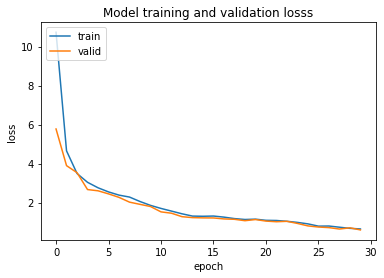

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model training and validation losss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

TESTING 

In [24]:
#TRIAL CODE 
accurate = 0
not_accurate = 0
threshold  = 15.0
for q in range(11900):
  anchor_extraction_for_test = model1(anchor_test[q].reshape((1, 64, 64, 1)))
  positive_extraction_for_test = model1(positive_test[q].reshape((1, 64, 64, 1)))
  negative_extraction_for_test = model1(negative_test[q].reshape((1,64,64,1)))


  anchor_pos_extraction = (anchor_extraction_for_test - positive_extraction_for_test) **2
  anchor_neg_extraction = (anchor_extraction_for_test - negative_extraction_for_test)**2

  anchor_pos_extraction = K.sum(anchor_pos_extraction)
  anchor_neg_extraction = K.sum(anchor_neg_extraction)

  if anchor_pos_extraction < threshold:
    accurate += 1
  if anchor_neg_extraction < threshold:
    not_accurate += 1  
  if anchor_neg_extraction > threshold:
    accurate += 1
  if anchor_pos_extraction > threshold:
    not_accurate += 1


In [25]:
print(accurate)
print(not_accurate)
print(accurate + not_accurate)
accuracy = (accurate / (accurate + not_accurate))
print(accuracy*100)

23777
23
23800
99.90336134453781


FACE DETECTION 

No of Faces5
[[ 22  18  74  74]
 [308  24  85  85]
 [134  27  78  78]
 [223  29  80  80]
 [422  36  82  82]]


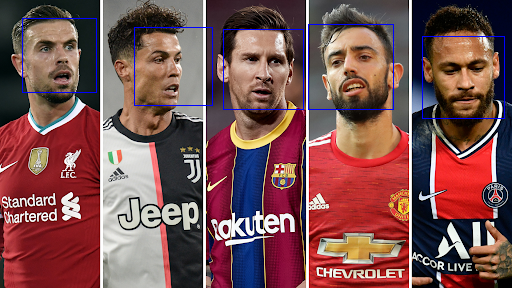

In [28]:
import cv2
face_cascade=cv2.CascadeClassifier("/content/drive/MyDrive/ML/haarcascade_frontalface.xml")
def detect(gray,frame):
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    print("No of Faces{}".format(len(faces)))
    print(faces)
    for(x,y,w,h)in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,2,0),thickness=1)
    return frame

image=cv2.imread("/content/drive/MyDrive/ML/Comeon.png")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

canvas=detect(gray,image)
from google.colab.patches import cv2_imshow
cv2_imshow(canvas)

In [ ]:
#THANK YOU 